# Purpose

Students have the option of using Pandas and SQL to complete this project. A Phase 1 project done completely in pandas, completely in SQL, or a mixture of the two can all be considered a fine Phase 1 project. This notebook serves as a resource for setting up an SQL database for students who wish to use SQL in their Phase 1 project.

**To create the `movies.db` database, run the code cells below.**
> The Entity Relational Diagram is below

In [66]:
import pandas as pd
import sqlite3 
conn = sqlite3.connect('data/movies.db')
cur = conn.cursor()
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from src.make_db import create_movies_db

In [3]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

![movies.db schema](images/movies_db_schema.png)

In [86]:
# rtom = pd.read_sql('''SELECT * 
#                 FROM rotten_tomatoes_movies
#                 ;''', conn)
# rtom.info(10)
#rotten_tomatoes_movies has 17,712 obs in 23 cols

# tn_budgets = pd.read_sql('''SELECT *
#                  FROM tn_movie_budgets
#                  ;''', conn)
# tn_budgets.info()
#tn_budgets has 5,782 obs in 7 columns

In [194]:
imdb = pd.read_sql('''SELECT *
                FROM imdb_title_basics
                ;''', conn)
imdb.info()
#146,144 entries in 7 cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   idx              146144 non-null  int64  
 1   tconst           146144 non-null  object 
 2   primary_title    146144 non-null  object 
 3   original_title   146123 non-null  object 
 4   start_year       146144 non-null  int64  
 5   runtime_minutes  114405 non-null  float64
 6   genres           140736 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 7.8+ MB


In [182]:
# bom = pd.read_sql('''SELECT *
#                 FROM bom_movie_gross
#                 ;''', conn)
# bom.info()
#3387 entries in 6 cols

In [183]:
# imdb_title = pd.read_sql('''SELECT *
#                 FROM imdb_title_ratings
#                 ;''', conn)
# imdb_title.info()
#73,856 entries in 4 cols

In [184]:
# tmdb = pd.read_sql('''SELECT *
#                  FROM tmdb_movies
#                  ;''', conn)
# tmdb.info()
#tmdb_movies has 26,517 rows in 10 columns

### testing formatting a date

In [185]:
#converts string date to formatted dates
tmdb.release_date = pd.to_datetime(tmdb.release_date)

In [195]:
imdb.head()
#note that genre_ids are formatted as strings

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [196]:
#isolate just one obs
imdb[1:2]['genres']

1    Biography,Drama
Name: genres, dtype: object

In [197]:
#make a subset of the database to play with
imdb_test = imdb.head(5)
imdb_test

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [199]:
#separate genre_ids by commas
imdb_split = imdb_test['genres'].str.split(',').explode()
#note: can only run this once

In [201]:
#how did it work?
imdb_split

0       Action
0        Crime
0        Drama
1    Biography
1        Drama
2        Drama
3       Comedy
3        Drama
4       Comedy
4        Drama
4      Fantasy
Name: genres, dtype: object

### code for searching for a specific title

In [5]:
#look for a specific title
df1 = imdb[imdb['primary_title'].str.contains("Star Wars")]
df1

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres
2370,2370,tt10239898,Star Wars: Battle for the Holocrons,Star Wars: Battle for the Holocrons,2020,NaN,"Action,Adventure,Fantasy"
2947,2947,tt10300394,Untitled Star Wars Film,Untitled Star Wars Film,2022,NaN,None
2948,2948,tt10300396,Untitled Star Wars Film,Untitled Star Wars Film,2024,NaN,None
2949,2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy
3219,3219,tt10321138,RiffTrax: Star Wars: The Force Awakens,RiffTrax: Star Wars: The Force Awakens,2016,NaN,Comedy
34425,34425,tt2275656,Star Wars: Threads of Destiny,Star Wars: Threads of Destiny,2014,110.0,"Action,Adventure,Sci-Fi"
41443,41443,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,136.0,"Action,Adventure,Fantasy"
42223,42223,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy"
42224,42224,tt2527338,Star Wars: The Rise of Skywalker,Star Wars: The Rise of Skywalker,2019,NaN,"Action,Adventure,Fantasy"
63494,63494,tt3648510,Plastic Galaxy: The Story of Star Wars Toys,Plastic Galaxy: The Story of Star Wars Toys,2014,70.0,"Documentary,History,Sci-Fi"


### merging tn_movie_budgets and imdb_title_basics

In [6]:

df = pd.read_sql('''SELECT release_date, movie, production_budget, domestic_gross, worldwide_gross, genres
                 FROM tn_movie_budgets AS tn
                 JOIN imdb_title_basics AS imdb
                 ON tn.movie = 
                 imdb.primary_title
                 ;''', conn)


In [82]:
df.info()
#note: only 3,815 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       3815 non-null   object
 1   movie              3815 non-null   object
 2   production_budget  3815 non-null   object
 3   domestic_gross     3815 non-null   object
 4   worldwide_gross    3815 non-null   object
 5   genres             3743 non-null   object
dtypes: object(6)
memory usage: 179.0+ KB


In [8]:
#what does x title look like in other db?
df1 = df[df['movie'].str.contains("Star Wars")]
df1

,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
8,"May 25, 2018",Solo: A Star Wars Story,"$275,000,000","$213,767,512","$393,151,347","Action,Adventure,Fantasy"
37,"Dec 16, 2016",Rogue One: A Star Wars Story,"$200,000,000","$532,177,324","$1,049,102,856","Action,Adventure,Sci-Fi"


Issues w/ different databases to this point:
1. the bottom line here is that both databases don't have the same movies in them. This is b.c. names are slightly different.
2. the genres don't equally match up, so they can't be compared. One may have more detail than another. Sol'n is either to do value_counts on combinations to see if there are logical groupings OR can separate on commas and represent movies in mulbiple genres. If this option, then make sure to watch out for influential outliers (e.g., Star Wars)

In [80]:
df_genres = df['genres'].value_counts()
df_genres.head(20)

Drama                         497
Documentary                   290
Comedy                        140
Comedy,Drama                  104
Horror                         95
Drama,Romance                  89
Comedy,Drama,Romance           84
Thriller                       81
Adventure,Animation,Comedy     73
Drama,Thriller                 63
Action,Crime,Drama             63
Comedy,Romance                 59
Action,Adventure,Sci-Fi        58
Horror,Thriller                56
Horror,Mystery,Thriller        47
Action                         46
Action,Adventure,Fantasy       41
Crime,Drama,Thriller           39
Action,Comedy,Crime            37
Action,Adventure,Drama         34
Name: genres, dtype: int64

Text(0.5, 1.0, 'Distribution of Movie Genres')

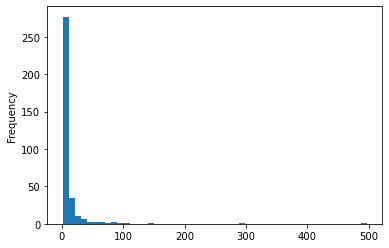

In [79]:
#df_genres.describe()
df_genres.plot(kind='hist', bins=50)
ax.set_title("Distribution of Movie Genres")

========================

#### make a plot of the top movie gross 1995-2021
based on data from here: https://m.the-numbers.com/market/

In [37]:
gross = pd.read_csv('data/tn_top_grossers.csv') 


In [38]:
gross['Total Box Office'] = gross['Total Box Office'].str.replace(',', '')
gross['Total Box Office'] = gross['Total Box Office'].str.replace('$', '')
gross[['Total Box Office']] = gross[['Total Box Office']].apply(pd.to_numeric) 
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              15 non-null     int64 
 1   Genre             15 non-null     object
 2   Movies            15 non-null     object
 3   Total Box Office  15 non-null     int64 
 4   Tickets           15 non-null     object
 5   Share             15 non-null     object
dtypes: int64(2), object(4)
memory usage: 848.0+ bytes


<ipython-input-38-65edaf8f2efd>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  gross['Total Box Office'] = gross['Total Box Office'].str.replace('$', '')


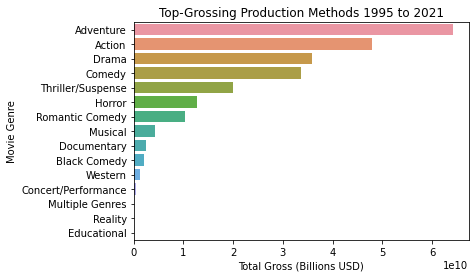

In [60]:
gross_plot = sns.barplot(data=gross, y="Genre", x="Total Box Office")
gross_plot.set(xlabel = "Total Gross (Billions USD)", ylabel='Movie Genre', title='Top-Grossing Production Methods 1995 to 2021')
gross_plot;